# 遗传算法（GA），解决机器人捡罐子

## 1.遗传算法

## 2. 代码

### 2.1 导入包 

In [1]:
import time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


### 2.2 各个模块代码

#### 2.2.1 生成初始种群

In [2]:
def generate_initial_population(population_size, gene_length):
    """
    生成初始种群。

    参数：
        population_size (int): 种群大小。
        gene_length (int): 基因长度，即每个个体的基因长度。

    返回值：
        population (array): 二维数组，表示初始种群。每行代表一个个体的基因。
                            其中每个基因都是长度为 gene_length 的整数数组。
    """
    # 生成随机的整数数组作为初始种群
    population = np.random.randint(0, 7, (population_size, gene_length))

    return population


#### 2.2.2 机器人的罐子世界及其行动方式

##### 2.2.3 生成罐子
每个格子有50%的概率有罐子，且每个格子只能有一个罐子。

In [3]:
def generate_random_can_locations(probability, world_size):
    """
    生成随机的垃圾位置。

    参数：
        probability (float): 生成垃圾的概率。
        world_size (int): 世界的大小。

    返回值：
        can_locations (set of tuples): 垃圾位置的集合，其中每个元素是一个坐标元组。
    """
    can_locations = set()  # 存储垃圾位置的集合

    # 遍历整个世界的格子
    for i in range(world_size):
        for j in range(world_size):
            # 根据给定的概率决定是否在当前格子放置垃圾
            if np.random.rand() < probability:
                can_locations.add((i, j))  # 将垃圾位置添加到集合中

    return can_locations

##### 2.2.4 模拟捡罐子任务
0：向北走

1：向南走

2：向东走

3：向西走

4：不动

5：捡起罐子

6：随机移动


##### 机器人当前状态

In [4]:

def get_surroundings(position, can_locations, world_size):
    """
    根据当前位置、可行位置和世界大小获取环境状态数组。

    参数：
        position (tuple): 当前位置的元组坐标。
        can_locations (list of tuples): 可行位置的坐标列表。
        world_size (int): 世界的大小。

    返回值：
        surroundings (array): 环境状态数组。
            0 表示空格，1 表示有垃圾，-1 表示墙壁。
            数组中的第一个元素表示当前格子，其余元素分别表示正东、正南、正西、正北格子。
    """
    # 初始化环境状态数组，使用一维数组
    surroundings = np.zeros(5, dtype=int)

    # 检查当前格子是否有垃圾
    if tuple(position) in can_locations:
        surroundings[0] = 1  # 当前格子有垃圾

    # 检查正东、正南、正西、正北格子是否有格子或墙
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 正东、正南、正西、正北
    for idx, (di, dj) in enumerate(directions):
        ni, nj = position[0] + di, position[1] + dj
        if (0 <= ni < world_size) and (0 <= nj < world_size):
            if (ni, nj) in can_locations:
                surroundings[idx + 1] = 1  # 东南西北格子有垃圾
        else:
            surroundings[idx + 1] = -1  # 东南西北格子是墙壁

    return surroundings




In [5]:
# 找到所有可能的情况
situations = []
for center in [-1, 0, 1]:
    for north in [-1, 0, 1]:
        for south in [-1, 0, 1]:
            for west in [-1, 0, 1]:
                for east in [-1, 0, 1]:
                    situations.append(np.array([center, east, west, south, north]))

# 生成字典以查找情况的基因索引
situ_dict = {}
for idx, situation in enumerate(situations):
    situ_dict[tuple(situation)] = idx

# 打印生成的字典
print(situ_dict)


{(-1, -1, -1, -1, -1): 0, (-1, 0, -1, -1, -1): 1, (-1, 1, -1, -1, -1): 2, (-1, -1, 0, -1, -1): 3, (-1, 0, 0, -1, -1): 4, (-1, 1, 0, -1, -1): 5, (-1, -1, 1, -1, -1): 6, (-1, 0, 1, -1, -1): 7, (-1, 1, 1, -1, -1): 8, (-1, -1, -1, 0, -1): 9, (-1, 0, -1, 0, -1): 10, (-1, 1, -1, 0, -1): 11, (-1, -1, 0, 0, -1): 12, (-1, 0, 0, 0, -1): 13, (-1, 1, 0, 0, -1): 14, (-1, -1, 1, 0, -1): 15, (-1, 0, 1, 0, -1): 16, (-1, 1, 1, 0, -1): 17, (-1, -1, -1, 1, -1): 18, (-1, 0, -1, 1, -1): 19, (-1, 1, -1, 1, -1): 20, (-1, -1, 0, 1, -1): 21, (-1, 0, 0, 1, -1): 22, (-1, 1, 0, 1, -1): 23, (-1, -1, 1, 1, -1): 24, (-1, 0, 1, 1, -1): 25, (-1, 1, 1, 1, -1): 26, (-1, -1, -1, -1, 0): 27, (-1, 0, -1, -1, 0): 28, (-1, 1, -1, -1, 0): 29, (-1, -1, 0, -1, 0): 30, (-1, 0, 0, -1, 0): 31, (-1, 1, 0, -1, 0): 32, (-1, -1, 1, -1, 0): 33, (-1, 0, 1, -1, 0): 34, (-1, 1, 1, -1, 0): 35, (-1, -1, -1, 0, 0): 36, (-1, 0, -1, 0, 0): 37, (-1, 1, -1, 0, 0): 38, (-1, -1, 0, 0, 0): 39, (-1, 0, 0, 0, 0): 40, (-1, 1, 0, 0, 0): 41, (-1, -1, 1,

In [6]:
def get_action(now_surrounding, individual):
    """
    根据当前环境状态和个体基因获取动作。

    参数：
        now_surrounding (array): 当前环境状态的数组。
        individual (array): 个体的基因数组。

    返回值：
        action: 根据个体基因和环境状态获取的动作。
    """
    # 根据当前环境状态查找基因索引
    gene_idx = situ_dict[tuple(now_surrounding)]
    # 获取对应基因的动作
    action = individual[gene_idx]
    return action


In [7]:
def simulate_cleaning_task(individual, probability, world_size):
    """
    模拟清扫任务，并返回得分
    :param individual: 个体策略
    :param probability: 垃圾出现的概率
    :param world_size: 世界的大小
    :return: 清扫得分
    """
    robot_position = np.array([np.random.randint(1, world_size + 1), np.random.randint(1, world_size + 1)])

    score = 0
    moves_left = 200
    can_locations = generate_random_can_locations(probability, world_size)

    for _ in range(moves_left):
        new_position = robot_position
        now_surrounding = get_surroundings(new_position, can_locations, world_size)
        action = get_action(now_surrounding, individual)
        if action == 0:
            new_position, score = move_north(robot_position, world_size, score)
        if action == 1:
            new_position, score = move_south(robot_position, world_size, score)
        if action == 2:
            new_position, score = move_east(robot_position, world_size, score)
        if action == 3:
            new_position, score = move_west(robot_position, world_size, score)
        if action == 4:
            pass
        if action == 5:
            score = pick_can(robot_position, can_locations, score)
        if action == 6:
            new_position, score = move_random(robot_position, world_size, score)

        robot_position = new_position
        
        moves_left -= 1
        if moves_left <= 0:
            break
    
    return score

    
def move_north(position, world_size, score):
    """
    向北移动
    """
    new_position = np.array([position[0] - 1, position[1]])
    if 0 <= new_position[0] <= world_size:
        return new_position, score
    else:
        return position, score - 5

def move_south(position, world_size, score):
    """
    向南移动
    """
    new_position = np.array([position[0] + 1, position[1]])
    if 0 <= new_position[0] <= world_size:
        return new_position, score
    else:
        return position, score - 5

def move_east(position, world_size, score):
    """
    向东移动
    """
    new_position = np.array([position[0], position[1] + 1])
    if 0 <= new_position[1] <= world_size:
        return new_position, score
    else:
        return position, score - 5

def move_west(position, world_size, score):
    """
    向西移动
    """
    new_position = np.array([position[0], position[1] - 1])
    if 0 <= new_position[1] <= world_size:
        return new_position, score
    else:
        return position, score - 5

def pick_can(position, can_locations, score):
    """
    清理垃圾
    """
    if tuple(position) in can_locations:
        can_locations.remove(tuple(position))
        return score + 10
    else:
        return score - 1

def move_random(position, world_size, score):
    """
    随机移动
    """
    return random.choice([move_north, move_south, move_east, move_west])(position, world_size, score)

### 2.3 算法核心

#### 2.3.1 评估适应度

In [8]:
def evaluate_population(population):
    """
    计算群体中每个个体的适应度得分

    参数：
    - population: 一个包含所有个体的列表，每个个体是一个基因序列（策略）

    返回值：
    返回一个包含每个个体适应度得分的列表。
    """
    fitness_scores = []
    for individual in population:
        total_score = 0
        for _ in range(100):  # 执行100次清扫任务
            score = simulate_cleaning_task(individual,probability=0.5, world_size=10)
            total_score += score
        average_score = total_score / 100  # 计算平均得分
        fitness_scores.append(average_score)
    return fitness_scores

#### 2.3.2 选择父代个体


In [9]:
def normalize_fitness_scores(scores):
    """
    将适应度分数归一化。

    参数：
        scores (list or array): 适应度分数列表或数组。

    返回值：
        normalized_scores (array): 归一化的适应度分数数组。
    """
    # 将分数转换为 NumPy 数组
    scores_array = np.array(scores)
    # 平方适应度分数
    squared_scores = scores_array ** 2
    
    # 归一化适应度分数
    total_score = np.sum(squared_scores)
    normalized_scores = squared_scores / total_score
    
    return normalized_scores


In [10]:
def select_parents(population, fitness_scores, num_parents):
    """
    选择父母个体
    :param population: 当前种群
    :param fitness_scores: 每个个体的适应度评分
    :param num_parents: 选择的父母个数
    :return: 选中的父母个体列表
    """
    fitness_exponent = np.exp(fitness_scores)
    selection_probabilities = fitness_exponent / np.sum(fitness_exponent)
    parent_indices = np.random.choice(len(population), size=num_parents, p=selection_probabilities, replace=False)
    return [population[idx] for idx in parent_indices]

#### 2.3.3 生成子代个体

In [11]:
def crossover(parents):
    """
    交叉操作
    :param parents: 选中的父母个体列表
    :return: 生成的子代个体列表
    """
    np.random.shuffle(parents)  # 随机打乱父母的顺序
    children = []
    for i in range(0, len(parents), 2):
        parent1 = parents[i]
        parent2 = parents[i + 1]
        crossover_point = np.random.randint(1, len(parent1))  # 随机选择一个交叉点
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        children.append(child1)
        children.append(child2)
    return children

#### 2.3.4 基因突变

In [12]:
def mutate(child, mutation_rate):
    """
    变异操作
    :param child: 子代个体
    :param mutation_rate: 突变率
    :return: 变异后的子代个体
    """
    for i in range(len(child)):
        if np.random.random() < mutation_rate:
            child[i] = np.random.randint(0, 7)
    return child

#### 2.3.5 将子代个体添加到新群体中

In [13]:
def add_offspring_to_population(population, offspring):
    """
    将子代个体添加到种群中
    :param population: 当前种群
    :param offspring: 子代个体列表
    """
    population.extend(offspring)

#### 2.3.6 进化函数

In [14]:
# 进化函数
def evolve(population, fitness_scores, mutation_rate, population_size, num_parents):
    """
    进化函数
    :param population: 当前种群
    :param fitness_scores: 每个个体的适应度评分
    :param mutation_rate: 突变率
    :param population_size: 种群大小
    :param num_parents: 选择的父母个数
    :return: 新一代种群
    """
    new_population = []
    while len(new_population) < population_size:
        parents = select_parents(population, fitness_scores, num_parents)
        offspring = crossover(parents)
        offspring = [mutate(child, mutation_rate) for child in offspring]
        add_offspring_to_population(new_population, offspring)
    return np.array(new_population)

### 2.4 训练

#### 2.4.1 训练过程可视化

In [15]:
def plot_fitness_evolution(best_fitnesses, average_fitnesses, fig=None, ax=None):
    """
    绘制适应度的演变图表

    参数:
    best_fitnesses (list): 包含每次迭代的最好适应度值的列表
    average_fitnesses (list): 包含每次迭代的平均适应度值的列表
    fig (matplotlib.figure.Figure, optional): 图形对象，默认为 None
    ax (matplotlib.axes.Axes, optional): 坐标轴对象，默认为 None

    返回:
    fig (matplotlib.figure.Figure): 更新后的图形对象
    ax (matplotlib.axes.Axes): 更新后的坐标轴对象
    """
    # 创建图形和坐标轴对象
    if fig is None or ax is None:
        fig, ax = plt.subplots()
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Fitness')
        ax.set_title('Fitness Evolution')
        ax.legend(['Best Fitness', 'Average Fitness'])

    # 绘制适应度变化图表
    ax.plot(range(1, len(best_fitnesses) + 1), best_fitnesses, label='Best Fitness')
    ax.plot(range(1, len(average_fitnesses) + 1), average_fitnesses, label='Average Fitness')
    ax.legend()

    # 更新图表
    plt.draw()
    plt.pause(0.01)  # 暂停一小段时间以便更新图表
    return fig, ax

#### 2.4.2 训练参数

In [16]:
# Parameters
population_size = 200
gene_length = 243
num_iterations = 1200
mutation_rate = 0.01
num_parents = 50

#### 2.4.3 训练过程

Iteration 1200, Best_fitness: 495.7, Time: 11.32 seconds,Total training time: 13729.52 seconds


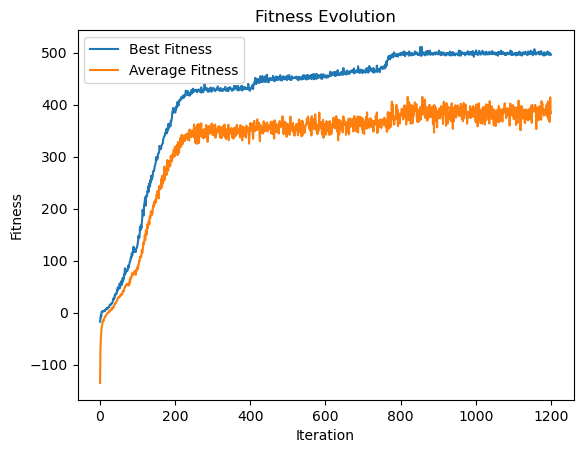

Best individuals and their fitnesses are saved to best_individuals.csv


In [17]:
# 定义 CSV 文件名
csv_filename = "best_individuals.csv"

# 生成初始种群
population = generate_initial_population(population_size, gene_length)
total_time = 0
# 用于存储最好的适应度和平均适应度
best_fitnesses = []
average_fitnesses = []
best_individuals = []  # 存储每次迭代的最佳个体
best_individual_fitnesses = []  # 存储每次迭代的最佳个体的适应度

for i in range(num_iterations):
    # 开始计时
    start_time = time.time()
    # 计算群体中每个个体的适应度
    fitness_scores = evaluate_population(population)
    best_fitness = np.max(fitness_scores)
    average_fitness = np.mean(fitness_scores)
    # 进化产生下一代群体
    population = evolve(population, fitness_scores, mutation_rate, population_size, num_parents)

    # 记录并显示最好的适应度和平均适应度
    best_fitnesses.append(best_fitness)
    average_fitnesses.append(average_fitness)

    # 更新最好的个体及其适应度
    best_individual_index = np.argmax(fitness_scores)
    best_individual = population[best_individual_index]
    best_individual_fitness = best_fitness

    # 保存最佳个体和适应度
    best_individuals.append(best_individual)
    best_individual_fitnesses.append(best_individual_fitness)

    clear_output(wait=True)
    # 结束计时并计算一次训练的时间
    end_time = time.time()
    training_time = end_time - start_time
    # 累加到总训练时间中
    total_time += training_time
    print(f"Iteration {i+1}, Best_fitness: {best_fitness}, Time: {training_time:.2f} seconds,Total training time: {total_time:.2f} seconds")
    # 绘制适应度演变图表
    fig, ax = plot_fitness_evolution(best_fitnesses, average_fitnesses)   

# 创建 DataFrame 存储最佳个体和适应度
df = pd.DataFrame({"Iteration": range(1, num_iterations + 1),
                   "Best_individual": [','.join(map(str, individual)) for individual in best_individuals],
                   "Fitness": best_individual_fitnesses})

# 将 DataFrame 写入 CSV 文件
df.to_csv(csv_filename, index=False)

# 输出完成消息
print(f"Best individuals and their fitnesses are saved to {csv_filename}")


## 3. 评估

### 3.1 可视化观察机器人捡罐子

In [19]:
def plot_locations(new_position, can_locations, world_size):
    grid = np.zeros((world_size, world_size))
    can_num = 0
    robot_position = new_position

    for pos in can_locations:
        grid[pos[0], pos[1]] = 1
        can_num += 1
    
    plt.scatter(robot_position[1], robot_position[0], color='red', marker='o', label='Robot')
    plt.imshow(grid, cmap='gray_r', interpolation='nearest')
    # plt.grid(True, color='black', linewidth=1)
    plt.title("Number of cans: " + str(can_num))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [20]:
def visualize_simulate_cleaning_task(individual, probability, world_size):
    """
    模拟清扫任务，并返回得分
    :param individual: 个体策略
    :param probability: 垃圾出现的概率
    :param world_size: 世界的大小
    :return: 清扫得分
    """
    robot_position = np.array([0, 1])

    score = 0
    moves_left = 200
    can_locations = generate_random_can_locations(probability, world_size)
    # can_locations = generate_fixed_can_locations(world_size)

    for _ in range(moves_left):
        new_position = robot_position
        clear_output(wait=True)
        plot_locations(new_position, can_locations, world_size)
        now_surrounding = get_surroundings(new_position, can_locations, world_size)
        action = get_action(now_surrounding, individual)
        if action == 0:
            new_position, score = move_north(robot_position, world_size, score)
        if action == 1:
            new_position, score = move_south(robot_position, world_size, score)
        if action == 2:
            new_position, score = move_east(robot_position, world_size, score)
        if action == 3:
            new_position, score = move_west(robot_position, world_size, score)
        if action == 4:
            pass
        if action == 5:
            score = pick_can(robot_position, can_locations, score)
        if action == 6:
            new_position, score = move_random(robot_position, world_size, score)

        robot_position = new_position
        moves_left -= 1
        if moves_left <= 0:
            break
    
    return score


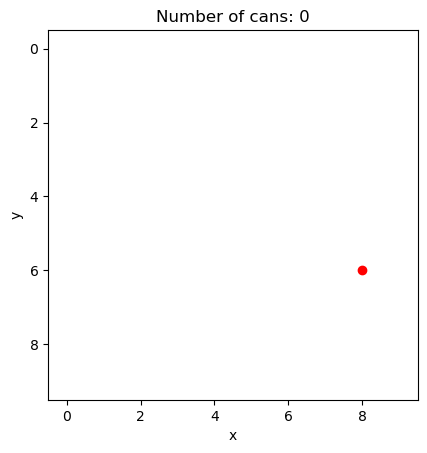

540

In [30]:
# 使用示例
best_individual_use = [0,3,6,5,2,6,5,0,3,0,3,6,6,3,6,2,3,3,0,2,2,4,6,2,6,5,1,2,1,4,1,4,1,4,0,3,2,5,3,1,3,6,2,5,2,1,4,2,3,3,6,5,2,6,3,2,1,3,4,5,3,3,4,4,0,2,2,1,4,3,2,2,0,3,0,0,6,1,6,3,1,3,4,2,3,1,2,2,1,5,1,0,4,3,3,2,4,1,1,1,0,0,2,3,2,6,1,4,0,2,2,1,1,2,1,1,2,0,2,2,3,0,2,1,1,1,6,2,0,3,3,2,6,0,3,0,0,0,2,2,3,6,3,2,0,0,2,0,0,2,1,0,2,0,0,2,3,3,2,6,1,0,1,3,4,2,5,5,6,5,2,0,4,0,5,5,5,6,1,6,6,5,5,3,5,5,3,5,4,6,5,5,3,5,5,0,5,5,5,5,5,5,5,5,1,1,1,3,5,3,5,5,5,2,1,1,2,5,1,5,5,3,4,0,2,5,5,5,5,5,5,6,1,1,3,5,5,3,5,5,5,1,1]
probability = 0.5
world_size = 10
visualize_simulate_cleaning_task(best_individual_use, probability, world_size)

### 3.2 测试代码

In [ ]:
# probability = 0.5
# world_size = 10
# robot_position = np.array([0, 0])  # 机器人初始位置
# can_locations = generate_random_can_locations(probability, world_size)
# # can_locations = generate_fixed_can_locations(world_size)
# plot_locations(robot_position, can_locations, world_size)

# print(can_locations)

In [ ]:
# now_surrounding = get_surroundings(robot_position, can_locations, 10)

# print(now_surrounding)

In [ ]:
# individual = [6, 5, 6, 3, 5, 3, 6, 5, 6, 2, 5, 2, 3, 5, 3, 2, 5, 2, 6, 5, 6, 3, 5, 3, 6, 5, 6, 1, 5, 1, 3, 5, 3, 1, 5, 1, 2, 5, 2, 3, 5, 3, 2, 5, 2, 1, 5, 1, 3, 5, 3, 1, 5, 1, 6, 5, 6, 3, 5, 3, 6, 5, 6, 2, 5, 2, 3, 5, 3, 2, 5, 2, 6, 5, 6, 3, 5, 3, 6, 5, 6, 0, 5, 0, 3, 5, 3, 0, 5, 0, 2, 5, 2, 3, 5, 3, 2, 5, 2, 0, 5, 0, 3, 5, 3, 0, 5, 0, 1, 5, 1, 3, 5, 3, 1, 5, 1, 2, 5, 2, 3, 5, 3, 2, 5, 2, 1, 5, 1, 3, 5, 3, 1, 5, 1, 0, 5, 0, 3, 5, 3, 0, 5, 0, 2, 5, 2, 3, 5, 3, 2, 5, 2, 0, 5, 0, 3, 5, 3, 0, 5, 0, 6, 5, 6, 3, 5, 3, 5, 6, 2, 5, 2, 3, 5, 3, 2, 5, 2, 6, 5, 6, 3, 5, 3, 6, 5, 6, 1, 5, 1, 3, 5, 3, 1, 5, 1, 2, 5, 2, 3, 5, 3, 2, 5, 2, 1, 5, 1, 3, 5, 3, 1, 5, 1, 6, 5, 6, 3, 5, 3, 6, 5, 6, 2, 5, 2, 3, 5, 3, 2, 5, 2, 6, 5, 6, 3, 5, 3, 4, 5, 4]
# print(get_action(now_surrounding, individual))
# print(individual[105])

In [ ]:
# # 测试
# population_size = 200
# gene_length = 243
# population = generate_initial_population(population_size, gene_length)
# the_evaluate = evaluate_population(population)
# print("最大值是:", max(the_evaluate))
# print("最小值是:", min(the_evaluate))
# print(the_evaluate)


In [ ]:
# # 一些随机适应度分数
# fitness_scores = [-647.68, -295.54, -529.48, -101.8, -31.71, 43.69, 48.83, -11.83, -255.42, -37.43, -797.93, -115.25, 59.14, 23.5, 36.3, -171.36, 47.58, 41.02, -190.43, -14.61, -13.46, 7.61, 38.88, -615.43, -218.29, -173.09, -395.74, -340.21, 72.54, -606.54, -278.02, -267.55, -648.59, -345.14, -119.84, -190.65, -380.34, -330.44, -107.84, -341.26, -428.41, -161.18, -182.49, -276.48, -578.84, 48.66, -247.67, -64.3, 31.69, -303.32, -5.99, -440.51, -654.0, -13.55, 12.96, 6.54, -115.97, 6.62, 24.04, -479.52, -384.65, -120.81, 34.38, -127.86, -472.13, -179.34, -420.93, -735.34, -425.79, 42.28, -691.46, -327.4, 36.32, -358.87, -383.28, -841.57, -374.67, -560.43, -662.94, 48.93, -181.62, -454.81, 35.75, -356.95, -14.72, -400.59, -337.36, -198.44, -389.21, -112.53, -47.64, 38.75, -223.42, -620.48, -92.05, 49.23, -267.41, -176.07, -138.49, -576.0, 31.39, -263.51, -276.9, -298.66, -434.16, -341.72, -13.13, -10.29, -391.32, -64.44, -165.94, -287.39, -36.65, -44.58, 42.41, 21.52, -10.36, -98.09, -546.6, -38.09, -332.77, -490.19, -79.86, -312.31, -704.5, -257.58, -537.61, -629.4, -65.3, -347.78, -418.64, -540.95, -453.3, -66.86, 55.35, -78.31, 51.37, 7.42, -113.55, -677.0, 18.26, -158.36, -607.69, -302.58, -368.94, -19.77, 37.28, 62.94, -460.46, -399.42, -427.29, -50.21, -152.22, -651.25, -616.77, -3.83, 18.14, -9.64, -310.53, -477.41, -18.22, -780.23, 16.41, -219.73, -54.95, -354.92, -78.57, -106.52, -164.53, -29.52, -251.71, -345.24, -273.8, -697.06, -655.42, -57.5, -98.71, -459.13, -86.34, -394.5, -102.69, -85.84, 40.75, -106.35, -358.26, -566.49, -59.81, -3.34, -150.71, -115.31, -153.29, -622.33, -264.32, -413.52, -56.18, -518.78, -108.8, -502.96, 44.94, -490.79]

# print("原始适应度分数：", fitness_scores)

# # 归一化适应度分数
# normalized_scores = normalize_fitness_scores(fitness_scores)
# print("归一化后的适应度分数：", normalized_scores)

# # 检查归一化后的分数总和是否为1
# print("归一化后的分数总和：", sum(normalized_scores))

# # 根据适应度计算选择概率
# selection_probabilities = normalized_scores / np.sum(normalized_scores)
# print("归一化后的分数总和：", selection_probabilities)